
# Feature transformations

Cuando vamos a trabajar con técnicas de Machine Learning  el **feature transformation** es el preprocesado de las variables necesario para que éstas tengan el formato adecuado a la hora de emplear las funciones de Python para la modelización que vamos a llevar a cabo con <code>scikitlearn</code>

Vamos a ilustrar el ejemplo con uno de los conjuntos con los que ya hemos trabajado.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/analisisydecision/intro_python_data_science/master/'
df = pd.read_csv (path + 'bank-additional-full.csv', sep = ';')

In [3]:
#Listado de las columnas del data frame
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

## Descripción de una variable

A la hora de aproximarnos a un problema de modelización que deseamos resolver con técnicas de Machine Learning el primer paso será la descripción de las variables disponibles, este trabajo se puede sofisticar y automatizar pero es necesario conocer las funciones básicas que nos ofrece pandas y matplotlib.

Para estudiar **variables continuas** disponemos de estadísticos básicos:

In [4]:
df['age'].sum()

1648511

In [5]:
df['age'].mean()

40.02406040594348

In [6]:
df['age'].std()

10.421249980934235

In [7]:
#Descriptivo de una variable
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

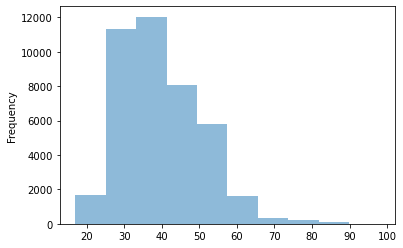

In [9]:
#Histograma de una variable
df['age'].plot.hist(alpha=0.5);

En este caso el ; del final de instrucción tiene su relevancia, es el que nos permite visualizar el gráfico.

En el caso de las **variables categóricas** podemos hacer tablas de frecuencias o gráficos de barras.

In [11]:
#Elementos únicos
list(df.education.unique())

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']

In [12]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

El caso siguiente va a producir un error, hay que indicar el valor numérico a representar:

TypeError: no numeric data to plot

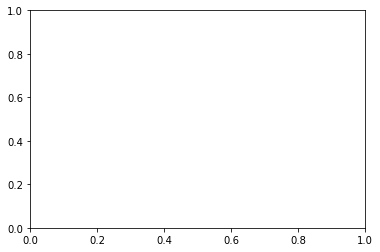

In [16]:
plt.figure();
df.education.plot.bar();

En este caso representamos el conteo, por defecto siempre será de mayor a menor:

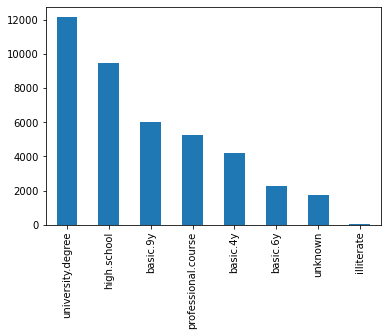

In [18]:
df.education.value_counts().plot.bar();

Para las tablas de frecuencias recodamos la conveniencia de emplear la función <code>crosstab</code>

In [19]:
pd.crosstab(df['marital'], df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
marital,,,,,,,,
divorced,489,182,565,1193,2,657,1337,187
married,3228,1767,4156,5158,15,3156,6394,1054
single,453,337,1316,3150,1,1424,4406,481
unknown,6,6,8,14,0,6,31,9


# Selección de variables

### Manejo de columnas con Pandas

Recuperamos las principales acciónes que podemos realizar con Pandas a las columnas de un data frame.

Selección de columnas:

In [19]:
seleccionadas = ['age', 'month']
df2 = df[seleccionadas]
df2.head()

,age,month
0,56,may
1,57,may
2,37,may
3,40,may
4,56,may


Eliminar columnas:

In [23]:
eliminadas = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df3 = df.drop(columns=eliminadas)

In [24]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Con estas premisas, a la hora de preparar nuestro conjunto de datos de entrenamiento especificaremos que columnas incluimos en el data frame de entrenamiento o que variables excluimos:

In [21]:
#Variables de entrenamiento
X_train = df.drop(columns='y')
Y_train = df['y']

### Operaciones con variables

Para mejorar la capacidad predictiva de nuestras variables es posible que sea necesario realizar transformaciones sobre ellas. En ocasiones serán cálculos directos, otras serán transformaciones, agrupaciones,... Esta tarea es de difícil automatización.

In [99]:
df = pd.read_csv (path + 'index.csv', sep = ',')

In [100]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [101]:
list(df.columns)

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [102]:
df['monthly_amount'] = df['Credit Amount']/df['Duration of Credit (month)']

In [103]:
df['No of Credits at this Bank'].value_counts()

1    633
2    333
3     28
4      6
Name: No of Credits at this Bank, dtype: int64

In [104]:
df['No of Credits at this Bank'] = df['No of Credits at this Bank'] - 1

In [105]:
df['No of Credits at this Bank'].value_counts()

0    633
1    333
2     28
3      6
Name: No of Credits at this Bank, dtype: int64

In [106]:
df['credit_rate'] = df['Concurrent Credits']/df['No of Credits at this Bank']

In [108]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,monthly_amount,credit_rate
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,0,3,1,1,1,58.277778,inf
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,1,3,2,1,1,311.000000,3.000000
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,0,2,1,1,1,70.083333,inf
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,1,2,2,1,2,176.833333,3.000000
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,1,2,1,1,2,180.916667,1.000000


In [111]:
#Reemplazar valores inf por valores perdidos
df['credit_rate'] = df['credit_rate'].replace([np.inf, -np.inf], np.nan)

In [112]:
df['credit_rate'].describe()

count    367.000000
mean       2.516803
std        0.820358
min        0.333333
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: credit_rate, dtype: float64

In [113]:
#Contabilizamos valores nulos
df['credit_rate'] .isnull().values.sum()

633

In [114]:
#Ratio del importe del crédito con respecto a la media
df['relatividad_credito'] = df['Credit Amount'] / df['Credit Amount'].mean()

In [115]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,monthly_amount,credit_rate,relatividad_credito
0,1,1,18,4,2,1049,1,2,4,2,...,3,1,0,3,1,1,1,58.277778,NaN,0.320673
1,1,1,9,4,0,2799,1,3,2,3,...,3,1,1,3,2,1,1,311.000000,3.0,0.855637
2,1,2,12,2,9,841,2,4,2,2,...,3,1,0,2,1,1,1,70.083333,NaN,0.257088
3,1,1,12,4,0,2122,1,3,3,3,...,3,1,1,2,2,1,2,176.833333,3.0,0.648682
4,1,1,12,4,0,2171,1,3,4,3,...,1,2,1,2,1,1,2,180.916667,1.0,0.663661
